In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
pnl_df = pd.read_csv("Data.csv", skiprows=2)
pnl_df["Position Return.4"] = pnl_df["Position Return.4"].str.rstrip('%').astype(float) / 100
pnl_df["Position Return.5"] = pnl_df["Position Return.5"].str.rstrip('%').astype(float) / 100
pnl_df["PR_Model_1.1"] = (pnl_df["Position Return.4"] + pnl_df["Position Return.5"]) / 2

pnl_df["Total Return.4"] = pnl_df["Total Return.4"].str.rstrip('%').astype(float) / 100
pnl_df["Total Return.5"] = pnl_df["Total Return.5"].str.rstrip('%').astype(float) / 100
pnl_df["TR_Model_1.1"] = (pnl_df["Total Return.4"] + pnl_df["Total Return.5"]) / 2
pnl_df["Date.5"] = pd.to_datetime(pnl_df["Date.5"], format="%m/%d/%Y")

In [61]:
pnl_df.head()

,Date,Position Return,Total Return,Date.1,Position Return.1,Total Return.1,Date.2,Position Return.2,Total Return.2,Date.3,Position Return.3,Total Return.3,Date.4,Position Return.4,Total Return.4,Date.5,Position Return.5,Total Return.5,PR_Model_1.1,TR_Model_1.1
0,12/30/2009,0.00%,-0.06%,12/30/2009,0.00%,-0.06%,1/2/2007,0.00%,-0.06%,1/2/2007,0.00%,-0.06%,1/2/2007,0.0000,-0.0006,2007-01-02,0.0000,-0.0006,0.00000,-0.00060
1,12/31/2009,-0.13%,-0.13%,12/31/2009,0.17%,0.16%,1/3/2007,-0.11%,-0.11%,1/3/2007,-0.41%,-0.42%,1/3/2007,-0.0012,-0.0012,2007-01-03,-0.0064,-0.0064,-0.00380,-0.00380
2,1/4/2010,-0.37%,-0.38%,1/4/2010,-0.12%,-0.13%,1/4/2007,0.08%,0.08%,1/4/2007,-0.25%,-0.25%,1/4/2007,0.0035,0.0034,2007-01-04,-0.0041,-0.0041,-0.00030,-0.00035
3,1/5/2010,-0.64%,-0.64%,1/5/2010,-1.01%,-1.01%,1/5/2007,-0.24%,-0.24%,1/5/2007,-0.17%,-0.17%,1/5/2007,-0.0012,-0.0012,2007-01-05,-0.0002,-0.0002,-0.00070,-0.00070
4,1/6/2010,-0.92%,-0.93%,1/6/2010,-0.62%,-0.65%,1/8/2007,0.44%,0.43%,1/8/2007,0.12%,0.12%,1/8/2007,0.0041,0.0041,2007-01-08,0.0010,0.0010,0.00255,0.00255


In [62]:
np.mean(pnl_df["TR_Model_1.1"]) * 256

0.075019181881211

In [63]:
np.std(pnl_df["TR_Model_1.1"]) * 16

0.07864747708776512

In [64]:
16 * np.mean(pnl_df["TR_Model_1.1"]) / np.std(pnl_df["TR_Model_1.1"])

0.9538663496795301

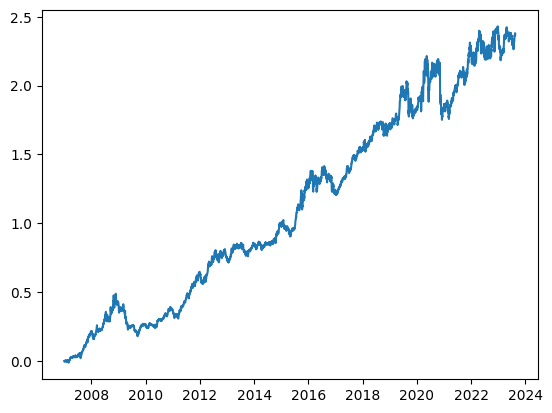

In [79]:
plt.plot(pnl_df["Date.5"], np.cumprod(pnl_df["TR_Model_1.1"] + 1) - 1)

In [68]:
len(pnl_df[pnl_df["TR_Model_1.1"] >= 0]) / len(pnl_df)

0.5657499422232494

In [65]:
np.mean(pnl_df[pnl_df["TR_Model_1.1"] >= 0]["TR_Model_1.1"])

0.0033858047385620918

In [66]:
np.mean(pnl_df[pnl_df["TR_Model_1.1"] < 0]["TR_Model_1.1"])

-0.00373626929217669

In [69]:
monthly_pnl_df = pnl_df.groupby(by=[pnl_df["Date.5"].dt.year, pnl_df["Date.5"].dt.month]).agg({"TR_Model_1.1": "sum"})
monthly_pnl_df.head()

In [71]:
monthly_pnl_df["TR_Model_1.1"].min()

-0.08290000000000002

In [72]:
np.mean(pnl_df["PR_Model_1.1"]) * 256

0.09045786919343657

In [73]:
np.std(pnl_df["PR_Model_1.1"]) * 16

0.07870432397677264

In [74]:
16 * np.mean(pnl_df["PR_Model_1.1"]) / np.std(pnl_df["PR_Model_1.1"])

1.1493379858028214

In [81]:
annual_pnl_df = pnl_df.groupby(by=[pnl_df["Date.5"].dt.year]).agg({"TR_Model_1.1": "sum"})
annual_pnl_df

,TR_Model_1.1
Date.5,
2007,0.19490
2008,0.16450
2009,-0.11320
2010,0.08220
2011,0.17950
2012,0.06960
2013,0.05550
2014,0.06840
2015,0.13900


In [86]:
16 * np.mean(pnl_df[(pnl_df["Date.5"] > '2020')]["TR_Model_1.1"]) / np.std(pnl_df[(pnl_df["Date.5"] > '2020')]["TR_Model_1.1"])

0.5078113801302431

In [88]:
pnl_df["CTR_Model_1.1"] = np.cumprod(pnl_df["TR_Model_1.1"] + 1) - 1

In [91]:
pnl_df["HWM_Model_1.1"] = pnl_df["CTR_Model_1.1"].cummax()

In [93]:
pnl_df["DW_Model_1.1"] = pnl_df["HWM_Model_1.1"] - pnl_df["CTR_Model_1.1"]

In [94]:
pnl_df.head()

,Date,Position Return,Total Return,Date.1,Position Return.1,Total Return.1,Date.2,Position Return.2,Total Return.2,Date.3,...,Position Return.4,Total Return.4,Date.5,Position Return.5,Total Return.5,PR_Model_1.1,TR_Model_1.1,CTR_Model_1.1,HWM_Model_1.1,DW_Model_1.1
0,12/30/2009,0.00%,-0.06%,12/30/2009,0.00%,-0.06%,1/2/2007,0.00%,-0.06%,1/2/2007,...,0.0000,-0.0006,2007-01-02,0.0000,-0.0006,0.00000,-0.00060,-0.000600,-0.0006,0.000000
1,12/31/2009,-0.13%,-0.13%,12/31/2009,0.17%,0.16%,1/3/2007,-0.11%,-0.11%,1/3/2007,...,-0.0012,-0.0012,2007-01-03,-0.0064,-0.0064,-0.00380,-0.00380,-0.004398,-0.0006,0.003798
2,1/4/2010,-0.37%,-0.38%,1/4/2010,-0.12%,-0.13%,1/4/2007,0.08%,0.08%,1/4/2007,...,0.0035,0.0034,2007-01-04,-0.0041,-0.0041,-0.00030,-0.00035,-0.004746,-0.0006,0.004146
3,1/5/2010,-0.64%,-0.64%,1/5/2010,-1.01%,-1.01%,1/5/2007,-0.24%,-0.24%,1/5/2007,...,-0.0012,-0.0012,2007-01-05,-0.0002,-0.0002,-0.00070,-0.00070,-0.005443,-0.0006,0.004843
4,1/6/2010,-0.92%,-0.93%,1/6/2010,-0.62%,-0.65%,1/8/2007,0.44%,0.43%,1/8/2007,...,0.0041,0.0041,2007-01-08,0.0010,0.0010,0.00255,0.00255,-0.002907,-0.0006,0.002307


In [95]:
pnl_df["DW_Model_1.1"].max()

0.46361380274901887